In [ ]:
!pip install transformers datasets
!pip install --upgrade transformers[torch] accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
import torch, os
import pandas as pd
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
from torch.utils.data import Dataset

In [ ]:
import pandas as pd
import gdown
import zipfile

download_url = 'https://drive.google.com/uc?export=download&id=19d_QDYFVtRPXQ7YVAsnDGA308csfTRnW'  # Replace with your link
filename = 'dataset.zip'  # Adjust filename if needed

gdown.download(download_url, filename, quiet=False)

# Extract the downloaded ZIP
with zipfile.ZipFile(filename, 'r') as zip_ref:
  zip_ref.extractall()

Downloading...
From: https://drive.google.com/uc?export=download&id=19d_QDYFVtRPXQ7YVAsnDGA308csfTRnW
To: /content/dataset.zip
100%|██████████| 104k/104k [00:00<00:00, 3.92MB/s]


In [ ]:
import glob
import pandas as pd

csv_files = glob.glob("/content/Dataset-for-intent-classification-2/*.csv")

dataframes = {}

for file in csv_files:
    df = pd.read_csv(file)
    dataframes[file] = df

for file, df in dataframes.items():
    print(file, df.shape)

/content/Dataset-for-intent-classification-2/df_search_product_information.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_contact_human.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_payment_issue.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_recover_password.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_unknown.csv (675, 2)
/content/Dataset-for-intent-classification-2/df_search.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_cancel_order.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_farewell.csv (494, 2)
/content/Dataset-for-intent-classification-2/df_get_refund.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_track_order.csv (1000, 2)
/content/Dataset-for-intent-classification-2/df_welcome.csv (783, 2)


In [ ]:
import pandas as pd
merged_df = pd.concat(dataframes.values(), ignore_index=True)

In [ ]:
merged_df

,text,intent
0,My dad bought this GPS and drives a Volvo truc...,search_product_information
1,what is that small box showing in the picture?...,search_product_information
2,will this work in my 1990buick park avenue i h...,search_product_information
3,What is the design and build quality like for ...,search_product_information
4,Does this have an SD card slot?,search_product_information
...,...,...
9947,I am Bella,welcome
9948,Hi how are you?,welcome
9949,Great thanks! I am Bella,welcome
9950,Hola,welcome


Unique intents: ['search_product_information' 'contact_human' 'payment_issue'
 'recover_password' 'unknown' 'search' 'cancel_order' 'farewell'
 'get_refund' 'track_order' 'welcome']
Intent counts:
 search_product_information    1000
contact_human                 1000
payment_issue                 1000
recover_password              1000
search                        1000
cancel_order                  1000
get_refund                    1000
track_order                   1000
welcome                        783
unknown                        675
farewell                       494
Name: intent, dtype: int64


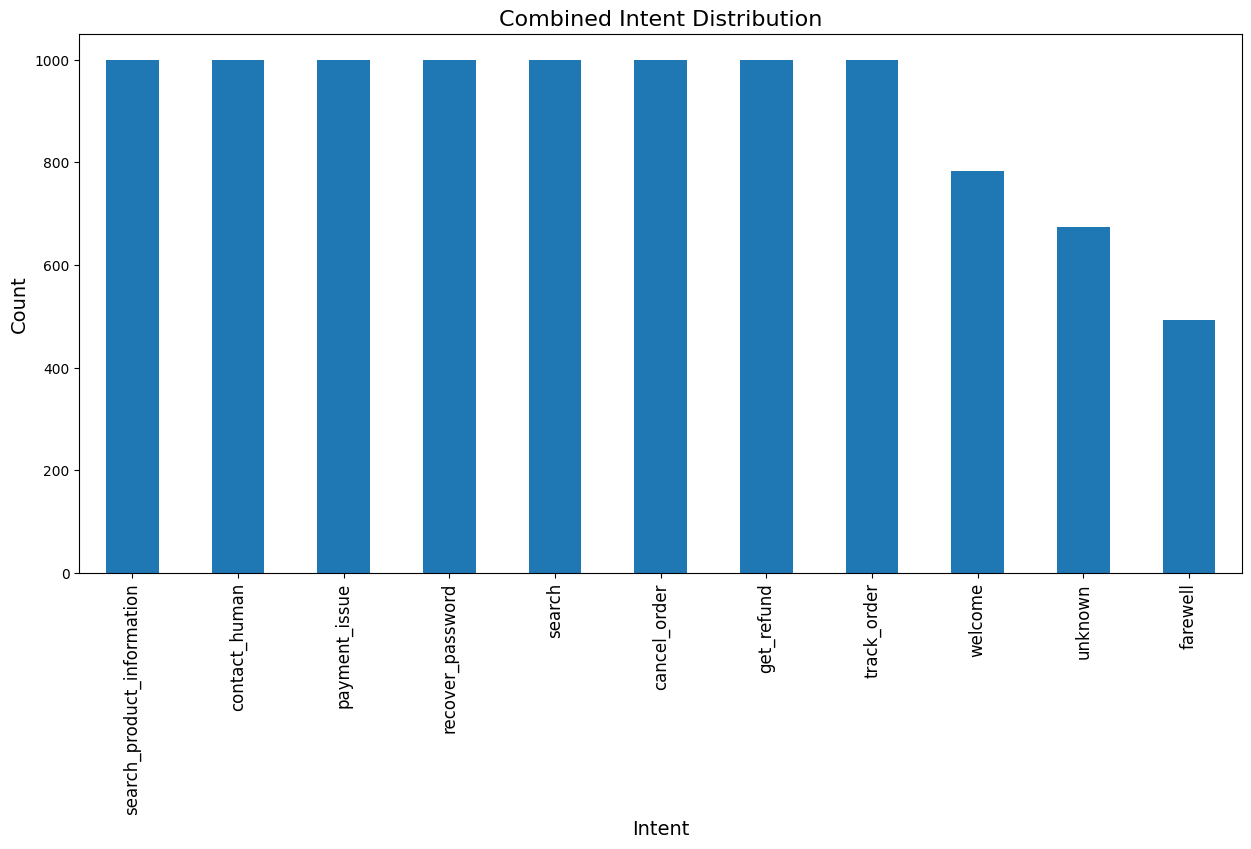

In [ ]:
import matplotlib.pyplot as plt

unique_intents = merged_df['intent'].unique()
intent_counts = merged_df['intent'].value_counts()

print("Unique intents:", unique_intents)
print("Intent counts:\n", intent_counts)

# Get the data
intents = merged_df['intent'].unique()
counts = merged_df['intent'].value_counts()

# Create the plot
plt.figure(figsize=(15, 7))
counts.plot(kind='bar')

# Add labels and title
plt.xlabel("Intent", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Combined Intent Distribution", fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=90, fontsize=12)

# Show the plot
plt.show()

In [ ]:
import string
import re
from nltk.stem import WordNetLemmatizer
import nltk

lemmatizer = WordNetLemmatizer()

def clean_text_preserve_order_numbers(text):


    order_numbers = re.findall(r"\d{6,}", text)  # Assuming order numbers have at least 6 digits

    # Clean the text (lowercase, remove punctuation, normalize spaces)
    cleaned_text = re.sub(r"[^\w\s@]", "", text.lower())
    cleaned_text = re.sub(r"\s+", " ", cleaned_text)

    # Re-insert preserved order numbers
    for num in order_numbers:
        cleaned_text = cleaned_text.replace(f" {num} ", f" ONUM{num} ")
    return cleaned_text


merged_df['clean_text'] = merged_df['text'].apply(clean_text_preserve_order_numbers)

In [ ]:
merged_df.head()

,text,intent,clean_text
0,My dad bought this GPS and drives a Volvo truc...,search_product_information,my dad bought this gps and drives a volvo truc...
1,what is that small box showing in the picture?...,search_product_information,what is that small box showing in the picture ...
2,will this work in my 1990buick park avenue i h...,search_product_information,will this work in my 1990buick park avenue i h...
3,What is the design and build quality like for ...,search_product_information,what is the design and build quality like for ...
4,Does this have an SD card slot?,search_product_information,does this have an sd card slot


In [ ]:
NumberOflabels= len(unique_intents)

id2label={id:label for id,label in enumerate(unique_intents)}
print(id2label)

{0: 'search_product_information', 1: 'contact_human', 2: 'payment_issue', 3: 'recover_password', 4: 'unknown', 5: 'search', 6: 'cancel_order', 7: 'farewell', 8: 'get_refund', 9: 'track_order', 10: 'welcome'}


In [ ]:
label2id={label:id for id,label in enumerate(unique_intents)}
print(label2id)

{'search_product_information': 0, 'contact_human': 1, 'payment_issue': 2, 'recover_password': 3, 'unknown': 4, 'search': 5, 'cancel_order': 6, 'farewell': 7, 'get_refund': 8, 'track_order': 9, 'welcome': 10}


In [ ]:
merged_df["labels"]=merged_df.intent.map(lambda x: label2id[x.strip()])

In [ ]:
text = merged_df['clean_text']
labels = merged_df['labels']

print("text",text.shape)
print("labels",labels.shape)

text (9952,)
labels (9952,)


In [ ]:
from operator import index
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)  # Adjust n_splits if needed

for train_index, test_index in sss.split(text, labels):
    train_txt, test_txt = text.iloc[train_index], text.iloc[test_index]
    train_label, test_labels = labels.iloc[train_index], labels.iloc[test_index]


print("X_train",train_txt.shape)
print("X_test",test_txt.shape)
print("y_train",train_label.shape)
print("y_test",test_labels.shape)

X_train (6966,)
X_test (2986,)
y_train (6966,)
y_test (2986,)


In [ ]:
test_txt= pd.DataFrame(test_txt)["clean_text"]
test_labels= pd.DataFrame(test_labels)["labels"]

sss_test = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for valid_index, test_index in sss_test.split(test_txt, test_labels):
  val_txt, test_txt = test_txt.iloc[valid_index], test_txt.iloc[test_index]
  val_label, test_labels = test_labels.iloc[valid_index], test_labels.iloc[test_index]

In [ ]:
print("train text",train_txt.shape)
print("test text",test_txt.shape)
print("validation text",val_txt.shape)
print("train label",train_label.shape)
print("test label",test_labels.shape)
print("validation label",val_label.shape)

train text (6966,)
test text (1493,)
validation text (1493,)
train label (6966,)
test label (1493,)
validation label (1493,)


In [ ]:
print("Train intent count:\n", train_label.value_counts())
print("Test intent count:\n", test_labels.value_counts())
print("validation intent count:\n", val_label.value_counts())

Train intent count:
 9     700
1     700
8     700
3     700
5     700
2     700
0     700
6     700
10    548
4     472
7     346
Name: labels, dtype: int64
Test intent count:
 8     150
9     150
6     150
2     150
1     150
3     150
0     150
5     150
10    117
4     102
7      74
Name: labels, dtype: int64
validation intent count:
 0     150
5     150
1     150
8     150
6     150
9     150
2     150
3     150
10    118
4     101
7      74
Name: labels, dtype: int64


In [ ]:
train_txt = list(train_txt)
test_txt = list(test_txt)
val_txt = list(val_txt)
train_label = list(train_label)
test_label = list(test_labels)
val_label = list(val_label)

In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased", max_length=512)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=NumberOflabels, id2label=id2label, label2id=label2id)
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
train_encodings = tokenizer(train_txt, truncation=True, padding=True)
val_encodings  = tokenizer(val_txt, truncation=True, padding=True)
test_encodings = tokenizer(test_txt, truncation=True, padding=True)

In [ ]:
class DataLoader(Dataset):

    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataloader = DataLoader(train_encodings, train_label)

val_dataloader = DataLoader(val_encodings, val_label)

test_dataset = DataLoader(test_encodings, test_label)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):

    # Extract true labels from the input object
    labels = pred.label_ids

    # Obtain predicted class labels by finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)

    # Compute macro precision, recall, and F1 score using sklearn's precision_recall_fscore_support function
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    # Calculate the accuracy score using sklearn's accuracy_score function
    acc = accuracy_score(labels, preds)

    # Return the computed metrics as a dictionary
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [ ]:
from transformers import TrainingArguments, Trainer

In [ ]:
training_args = TrainingArguments(
    output_dir='/content/Folder',  # Output directory for model predictions and checkpoints
    do_train=True,                  # Train the model
    do_eval=True,                   # Evaluate the model during training
    num_train_epochs=3,              # Number of training epochs (iterations over the dataset)
    per_device_train_batch_size=16,  # Batch size for training on a single device
    per_device_eval_batch_size=32,   # Batch size for evaluation on a single device
    warmup_steps=100,                # Number of warmup steps for linear learning rate scheduler
    weight_decay=0.01,               # Weight decay (L2 regularization)
    logging_strategy='steps',       # Logging strategy (here, log every 'steps' steps)
    logging_dir='/content/multi-class-logs',  # TensorBoard log directory
    logging_steps=50,               # Number of steps between logging entries
    evaluation_strategy="steps",    # Evaluation strategy (here, evaluate every 'steps' steps)
    eval_steps=50,                   # Number of steps between evaluations
    save_strategy="steps",          # Model saving strategy (here, save every 'steps' steps)
    fp16=True,                       # Use mixed precision training (FP16) for potentially faster training
    load_best_model_at_end=True      # Load the best model based on the evaluation metric at the end of training
)

In [ ]:
trainer = Trainer(
    # the pre-trained model that will be fine-tuned
    model=model,
    args=training_args,
    train_dataset=train_dataloader,
    eval_dataset=val_dataloader,
    compute_metrics= compute_metrics
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,2.302900,2.011590,0.364367,0.308553,0.499832,0.357045
100,1.621900,0.838458,0.888145,0.857729,0.904440,0.859356
150,0.422400,0.127022,0.977897,0.975437,0.975891,0.975780
200,0.157300,0.087668,0.982585,0.980711,0.980358,0.981492
250,0.112600,0.085781,0.979236,0.977865,0.978526,0.977840
300,0.064400,0.059294,0.986604,0.984284,0.984113,0.984506
350,0.069900,0.076843,0.984595,0.981714,0.982041,0.981443
400,0.048000,0.078647,0.986604,0.984600,0.984872,0.984438
450,0.050900,0.090036,0.979906,0.976774,0.977372,0.976613
500,0.017900,0.061740,0.986604,0.984127,0.984766,0.983555


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=1308, training_loss=0.19410322052326953, metrics={'train_runtime': 219.1736, 'train_samples_per_second': 95.349, 'train_steps_per_second': 5.968, 'total_flos': 644406932087280.0, 'train_loss': 0.19410322052326953, 'epoch': 3.0})

In [ ]:
q=[trainer.evaluate(eval_dataset=df_org) for df_org in [train_dataloader, val_dataloader, test_dataset]]

pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.023208,0.995837,0.995190,0.995250,0.995151
val,0.061740,0.986604,0.984127,0.984766,0.983555
test,0.027323,0.993972,0.993481,0.993999,0.993119


In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

In [ ]:
def predict(text):

    # Tokenize the input text and move tensors to the GPU if available
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")

    # Get model output (logits)
    outputs = model(**inputs)

    probs = outputs[0].softmax(1)

    pred_label_idx = probs.argmax()

    pred_label = model.config.id2label[pred_label_idx.item()]

    return probs, pred_label_idx, pred_label

In [ ]:

text = "do samsung s25 support 5g"
predict(text)

(tensor([[9.9800e-01, 1.5923e-04, 3.2509e-04, 2.8490e-04, 1.6695e-04, 2.3293e-04,
          2.3950e-04, 9.2516e-05, 1.6372e-04, 1.0003e-04, 2.3044e-04]],
        device='cuda:0', grad_fn=<SoftmaxBackward0>),
 tensor(0, device='cuda:0'),
 'search_product_information')

In [ ]:
model_path = "intent-classification-model"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('intent-classification-model/tokenizer_config.json',
 'intent-classification-model/special_tokens_map.json',
 'intent-classification-model/vocab.txt',
 'intent-classification-model/added_tokens.json',
 'intent-classification-model/tokenizer.json')

In [ ]:
model_path = "intent-classification-model"


model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer= BertTokenizerFast.from_pretrained(model_path)
nlp= pipeline("text-classification", model=model, tokenizer=tokenizer)

In [ ]:
nlp("how are you")

[{'label': 'welcome', 'score': 0.9929744005203247}]